In [3]:
#importing libraries
import pandas as pd;
import numpy as np;

In [4]:
#Reading dataset
df = pd.read_excel(r'C:\Users\shiva\Raisin_Dataset.xlsx')

In [5]:
#First five rows of dataset
df.head()

,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 3.2 Final//EN"">"
0,<html>
1,<head>
2,<title>Index of /ml/machine-learning-databas...
3,</head>
4,<body>


In [31]:
#To check weather there is any NULL value in any column
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [32]:
#To print information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [33]:
#overview of dataset
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [34]:
#importing seaborn and matplotlib to plot graph of relations and represent statical data
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:>

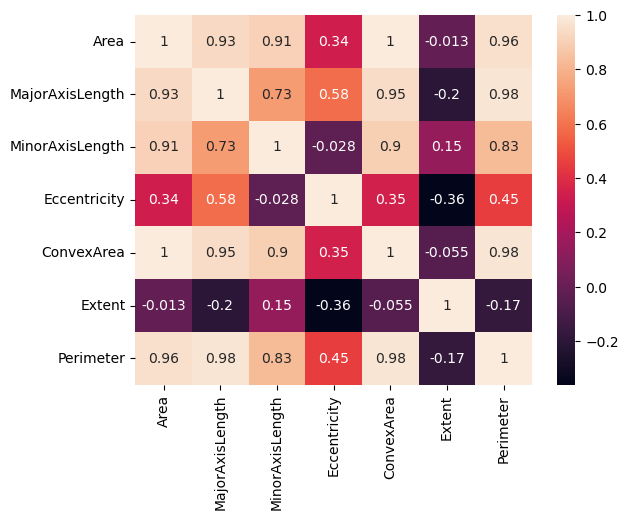

In [35]:
#Creating Heatmap of correlations
sns.heatmap(df.corr(),annot = True)

In [36]:
#Counting frequency of values in class column
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


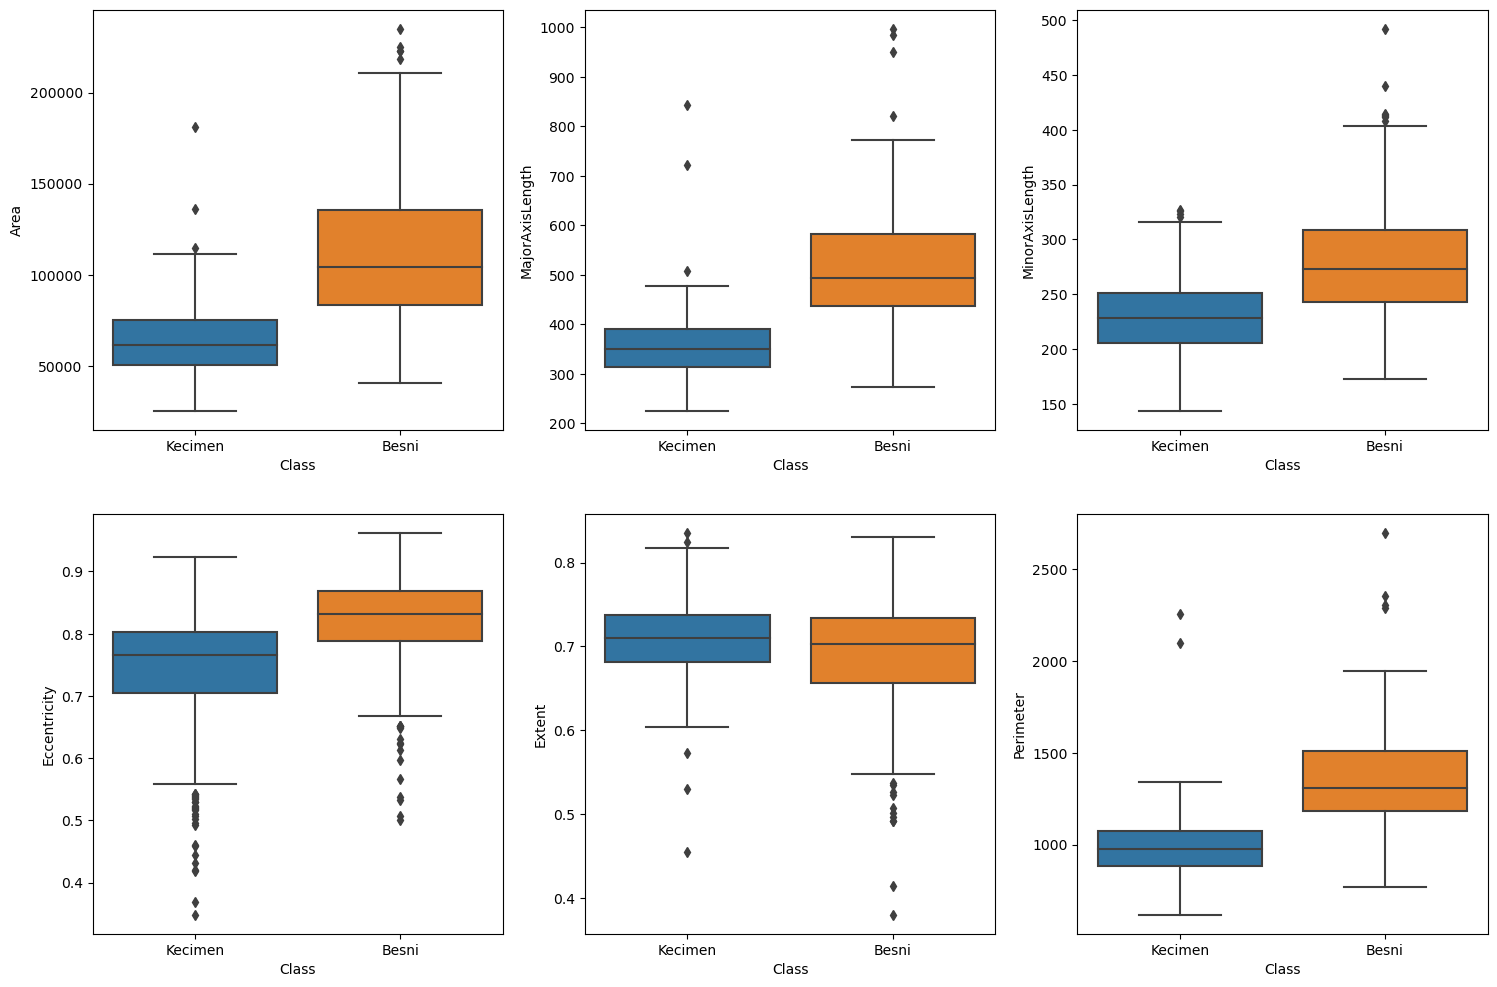

In [37]:
#plotting cordinate plane
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18,12)
print(ax)
ax = ax.flatten()
print(ax)
clmn = df.columns.tolist()
clmn.remove('Class')
clmn.remove('ConvexArea')

for ax ,clmn in zip(ax ,clmn):
    sns.boxplot(data = df , x = "Class" , y = clmn , ax = ax )
    #axis.set_title(clmn)

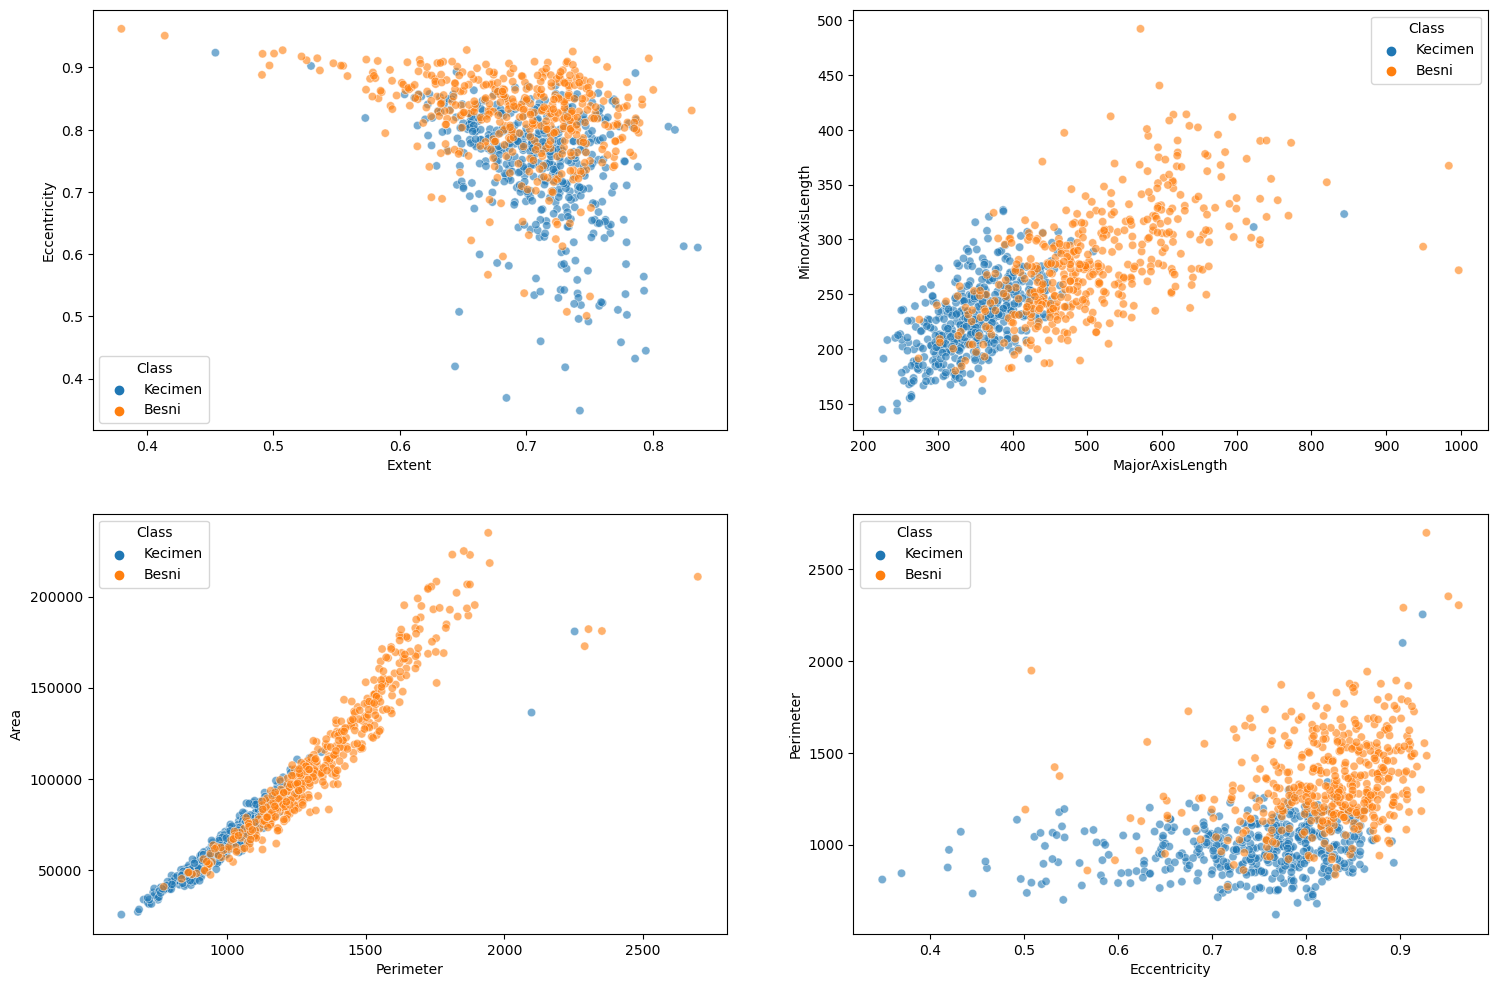

In [38]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(18,12)
ax = ax.flatten()
inspect_pairs = [('Extent','Eccentricity'),('MajorAxisLength','MinorAxisLength'),('Perimeter','Area'),('Eccentricity','Perimeter')]

for axis , pair in zip(ax,inspect_pairs):
    x_feat , y_feat = pair
    sns.scatterplot(data = df , x = x_feat , y = y_feat , hue = "Class",ax = axis , alpha = 0.6)

In [39]:
#converting dataset into array
dataset = df.values
dataset

array([[87524, 442.2460114, 253.291155, ..., 0.758650579, 1184.04,
        'Kecimen'],
       [75166, 406.690687, 243.0324363, ..., 0.68412957, 1121.786,
        'Kecimen'],
       [90856, 442.2670483, 266.3283177, ..., 0.637612812, 1208.575,
        'Kecimen'],
       ...,
       [99657, 431.7069809, 298.8373229, ..., 0.741098519, 1292.828,
        'Besni'],
       [93523, 476.3440939, 254.1760536, ..., 0.658798253, 1258.548,
        'Besni'],
       [85609, 512.0817743, 215.2719758, ..., 0.632019963, 1272.862,
        'Besni']], dtype=object)

In [40]:
#dataset till 7th column
x = dataset[:,0:7]
print(x)

[[87524 442.2460114 253.291155 ... 90546 0.758650579 1184.04]
 [75166 406.690687 243.0324363 ... 78789 0.68412957 1121.786]
 [90856 442.2670483 266.3283177 ... 93717 0.637612812 1208.575]
 ...
 [99657 431.7069809 298.8373229 ... 106264 0.741098519 1292.828]
 [93523 476.3440939 254.1760536 ... 97653 0.658798253 1258.548]
 [85609 512.0817743 215.2719758 ... 89197 0.632019963 1272.862]]


In [41]:
#binarization
y = df["Class"].apply(lambda x:1 if x == 'Kecimen' else 0).to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
#importing preprocessing
from sklearn import preprocessing

In [43]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.29637031, 0.28071404, 0.314376  , ..., 0.25550425, 0.83142179,
        0.27179088],
       [0.23742726, 0.23463777, 0.28494465, ..., 0.20886392, 0.66785449,
        0.24184205],
       [0.31226271, 0.2807413 , 0.35177845, ..., 0.26808369, 0.56575414,
        0.28359405],
       ...,
       [0.3542402 , 0.26705647, 0.44504387, ..., 0.31785796, 0.79289651,
        0.32412604],
       [0.32498331, 0.32490187, 0.31691469, ..., 0.2836979 , 0.61225439,
        0.3076348 ],
       [0.28723648, 0.37121445, 0.20530238, ..., 0.25015273, 0.55347831,
        0.3145209 ]])

In [44]:
from sklearn.model_selection import train_test_split
x_train , x_val_and_test,y_train , y_val_and_test = train_test_split(x_scale , y ,test_size = 0.3 )

In [45]:
x_val , x_test , y_val , y_test = train_test_split(x_val_and_test,y_val_and_test,test_size = 0.5 )

In [46]:
print(x_train)

[[0.17251264 0.14922858 0.25167319 ... 0.14694658 0.77908055 0.16223188]
 [0.30996852 0.33045919 0.27916188 ... 0.26851609 0.57880567 0.3043303 ]
 [0.26802442 0.25742964 0.29204532 ... 0.22613635 0.8396125  0.23845048]
 ...
 [0.6737909  0.49551063 0.59084666 ... 0.56697133 0.82015553 0.45946969]
 [0.16379853 0.14438171 0.2527463  ... 0.14428867 0.66693594 0.16710805]
 [0.15031957 0.17518769 0.17307227 ... 0.13352216 0.74313415 0.17382001]]


In [47]:
print(y_train)

[0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0
 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0
 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 0 1 0 0 1 1 0 1 1 0 

In [48]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
print(2+3)

5


In [51]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras import regularizers

In [52]:
print(2+3)

5


In [65]:
model = Sequential([
    Dense(100,activation = 'relu' , kernel_regularizer = regularizers.l2(0.01) , input_shape = (7,)),
    Dropout(0.2),
    Dense(64,activation = 'relu' , kernel_regularizer = regularizers.l2(0.01)) ,
    Dropout(0.2),
    Dense(32,activation = 'relu' , kernel_regularizer = regularizers.l2(0.01)) , 
    Dense(10,activation = 'relu' , kernel_regularizer = regularizers.l2(0.01)) ,
    Dense(1,activation = 'sigmoid' , kernel_regularizer = regularizers.l2(0.01)) ,      
    
])

In [66]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [67]:
from keras.callbacks import EarlyStopping , ModelCheckpoint

In [68]:
es = EarlyStopping(monitor = 'val_accuracy' , mode = 'max' , verbose = 1 , patience = 50)

In [69]:
mc = ModelCheckpoint('model.h5' , monitor = 'val_accuracy', mode = 'max')

In [70]:
hist = model.fit(x_train , y_train , batch_size = 32 , epochs = 150 , validation_data = (x_val , y_val) , callbacks = [mc,es] )

Epoch 1/150
20/20 [==============================] - 2s 27ms/step - loss: 2.0084 - accuracy: 0.5730 - val_loss: 1.8185 - val_accuracy: 0.8963
Epoch 2/150
20/20 [==============================] - 0s 6ms/step - loss: 1.6826 - accuracy: 0.6937 - val_loss: 1.5279 - val_accuracy: 0.7630
Epoch 3/150
20/20 [==============================] - 0s 7ms/step - loss: 1.4294 - accuracy: 0.7286 - val_loss: 1.3052 - val_accuracy: 0.7481
Epoch 4/150
20/20 [==============================] - 0s 6ms/step - loss: 1.2281 - accuracy: 0.7444 - val_loss: 1.1165 - val_accuracy: 0.8815
Epoch 5/150
20/20 [==============================] - 0s 6ms/step - loss: 1.0742 - accuracy: 0.7635 - val_loss: 0.9547 - val_accuracy: 0.9037
Epoch 6/150
20/20 [==============================] - 0s 6ms/step - loss: 0.9308 - accuracy: 0.7952 - val_loss: 0.8148 - val_accuracy: 0.8815
Epoch 7/150
20/20 [==============================] - 0s 6ms/step - loss: 0.8219 - accuracy: 0.8175 - val_loss: 0.7076 - val_accuracy: 0.8889
Epoch 8/150


Epoch 59/150
20/20 [==============================] - 0s 7ms/step - loss: 0.5045 - accuracy: 0.8476 - val_loss: 0.4340 - val_accuracy: 0.9037
Epoch 60/150
20/20 [==============================] - 0s 5ms/step - loss: 0.4961 - accuracy: 0.8587 - val_loss: 0.4417 - val_accuracy: 0.9037
Epoch 61/150
20/20 [==============================] - 0s 5ms/step - loss: 0.5052 - accuracy: 0.8222 - val_loss: 0.4309 - val_accuracy: 0.9111
Epoch 62/150
20/20 [==============================] - 0s 5ms/step - loss: 0.4955 - accuracy: 0.8556 - val_loss: 0.4419 - val_accuracy: 0.9037
Epoch 63/150
20/20 [==============================] - 0s 6ms/step - loss: 0.5076 - accuracy: 0.8444 - val_loss: 0.4419 - val_accuracy: 0.9037
Epoch 64/150
20/20 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.8508 - val_loss: 0.4378 - val_accuracy: 0.9037
Epoch 65/150
20/20 [==============================] - 0s 5ms/step - loss: 0.5071 - accuracy: 0.8508 - val_loss: 0.4699 - val_accuracy: 0.8667
Epoch 

In [71]:
model.evaluate(x_test , y_test)[1]

5/5 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.8593


0.8592592477798462

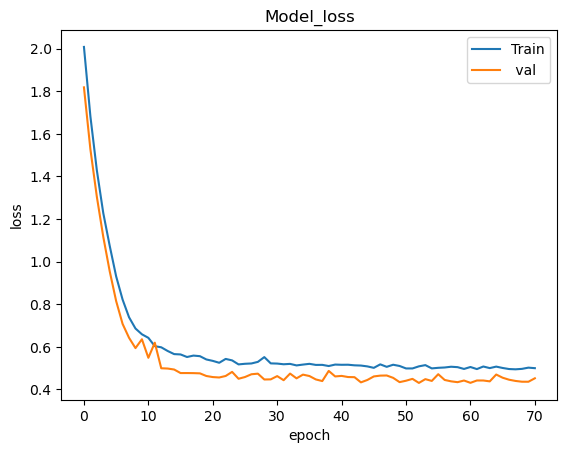

In [73]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train' , ' val'] , loc = 'upper right')
plt.show()

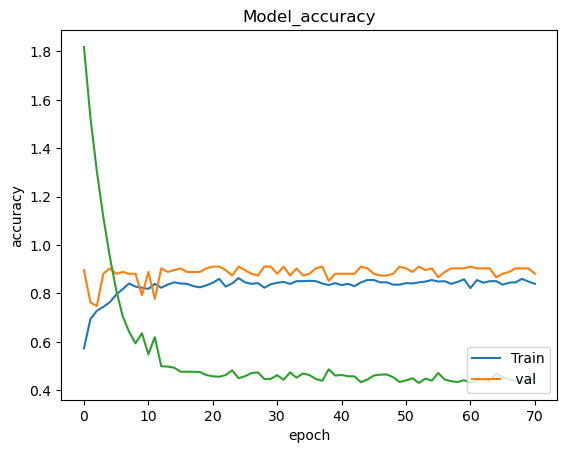

In [74]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['val_loss'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train' , ' val'] , loc = 'lower right')
plt.show()